In [1]:
pip install ydata-profiling

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd, numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns, matplotlib.pyplot as plt
import pandas_profiling
import warnings
warnings.simplefilter("ignore")

C:\Users\Yagnashree Velanki\AppData\Local\Temp\ipykernel_11468\1054899680.py:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [3]:
# Reading Train datasets
train = pd.read_csv("Train-Set.csv")
train.head(5)

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# Reading Test datasets
test = pd.read_csv("Test-Set.csv")
test.head(5)

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
# Columns in the datasets 
print('Columns in Train set', train.columns)
print('Columns in Test set', test.columns)

Columns in Train set Index(['ProductID', 'Weight', 'FatContent', 'ProductVisibility', 'ProductType',
       'MRP', 'OutletID', 'EstablishmentYear', 'OutletSize', 'LocationType',
       'OutletType', 'OutletSales'],
      dtype='object')
Columns in Test set Index(['ProductID', 'Weight', 'FatContent', 'ProductVisibility', 'ProductType',
       'MRP', 'OutletID', 'EstablishmentYear', 'OutletSize', 'LocationType',
       'OutletType'],
      dtype='object')


In [6]:
# shape of datasets
print('Shape of Train set', train.shape)
print('Shape of Test set', test.shape)

Shape of Train set (8523, 12)
Shape of Test set (5681, 11)


In [7]:
# Different data types in the datasets
print('Description of Train set \n ')
train.info()

Description of Train set 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          8523 non-null   object 
 1   Weight             7060 non-null   float64
 2   FatContent         8523 non-null   object 
 3   ProductVisibility  8523 non-null   float64
 4   ProductType        8523 non-null   object 
 5   MRP                8523 non-null   float64
 6   OutletID           8523 non-null   object 
 7   EstablishmentYear  8523 non-null   int64  
 8   OutletSize         6113 non-null   object 
 9   LocationType       8523 non-null   object 
 10  OutletType         8523 non-null   object 
 11  OutletSales        8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
print('Description of Train set \n')
test.info()

Description of Train set 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          5681 non-null   object 
 1   Weight             4705 non-null   float64
 2   FatContent         5681 non-null   object 
 3   ProductVisibility  5681 non-null   float64
 4   ProductType        5681 non-null   object 
 5   MRP                5681 non-null   float64
 6   OutletID           5681 non-null   object 
 7   EstablishmentYear  5681 non-null   int64  
 8   OutletSize         4075 non-null   object 
 9   LocationType       5681 non-null   object 
 10  OutletType         5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


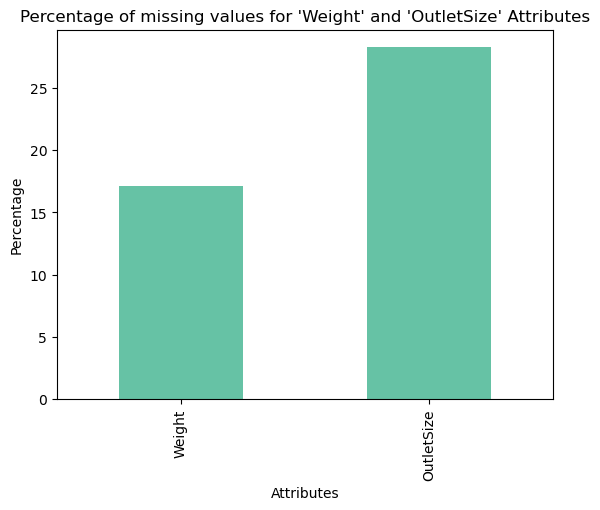

In [9]:
# There are some missing values in the train and test datasets. Attributes with missing data are- 'Weight' and 'OutlestSize'
# Weight is float datatype and OutletSize is of object datatype
Missing_data = train[['Weight', "OutletSize"]]

# Missing values can be ignored or filled with mean/mode values to neutralize the size of all attributes in the dataset. So, checking on percentage of missing values
missing_percentage = Missing_data.isnull().sum() / len(Missing_data) * 100

missing_percentage.plot(kind='bar', x='Column', y='Percentage', colormap='Set2')
plt.xlabel("Attributes")
plt.ylabel("Percentage")
plt.title("Percentage of missing values for 'Weight' and 'OutletSize' Attributes")

plt.show()

In [10]:
train_sorted = train.sort_values(by=['ProductID'])
train_sorted.head(10)

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
8043,DRA12,11.60,Low Fat,0.068535,Soft Drinks,143.0154,OUT010,1998,NaN,Tier 3,Grocery Store,283.6308
118,DRA12,11.60,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2007,NaN,Tier 2,Supermarket Type1,2552.6772
1693,DRA12,11.60,LF,0.000000,Soft Drinks,141.9154,OUT035,2004,Small,Tier 2,Supermarket Type1,992.7078
1197,DRA12,11.60,Low Fat,0.000000,Soft Drinks,141.6154,OUT045,2002,NaN,Tier 2,Supermarket Type1,3829.0158
1245,DRA12,11.60,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,1987,High,Tier 3,Supermarket Type1,2552.6772
7467,DRA12,11.60,Low Fat,0.041113,Soft Drinks,142.0154,OUT018,2009,Medium,Tier 3,Supermarket Type2,850.8924
8195,DRA24,19.35,Regular,0.039895,Soft Drinks,162.4868,OUT013,1987,High,Tier 3,Supermarket Type1,4422.2436
6863,DRA24,19.35,Regular,0.039990,Soft Drinks,165.0868,OUT049,1999,Medium,Tier 1,Supermarket Type1,982.7208
2879,DRA24,NaN,Regular,0.069909,Soft Drinks,163.2868,OUT019,1985,Small,Tier 1,Grocery Store,491.3604
4416,DRA24,NaN,Regular,0.039735,Soft Drinks,165.7868,OUT027,1985,Medium,Tier 3,Supermarket Type3,4913.6040


In [11]:
train_sorted.tail(10)

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
2084,NCZ53,NaN,Low Fat,0.024359,Health and Hygiene,190.4214,OUT027,1985,Medium,Tier 3,Supermarket Type3,5652.6420
1267,NCZ53,9.60,Low Fat,0.024577,Health and Hygiene,186.6214,OUT018,2009,Medium,Tier 3,Supermarket Type2,1884.2140
3959,NCZ53,9.60,Low Fat,0.024457,Health and Hygiene,186.6214,OUT013,1987,High,Tier 3,Supermarket Type1,3203.1638
2839,NCZ54,14.65,Low Fat,0.083359,Household,161.9552,OUT046,1997,Small,Tier 1,Supermarket Type1,4711.2008
1969,NCZ54,14.65,Low Fat,0.083528,Household,162.4552,OUT045,2002,NaN,Tier 2,Supermarket Type1,2274.3728
7926,NCZ54,14.65,Low Fat,0.083489,Household,161.3552,OUT049,1999,Medium,Tier 1,Supermarket Type1,7148.0288
214,NCZ54,14.65,Low Fat,0.000000,Household,161.5552,OUT010,1998,NaN,Tier 3,Grocery Store,324.9104
1896,NCZ54,NaN,Low Fat,0.082956,Household,164.0552,OUT027,1985,Medium,Tier 3,Supermarket Type3,5523.4768
7166,NCZ54,NaN,Low Fat,0.145952,Household,160.9552,OUT019,1985,Small,Tier 1,Grocery Store,162.4552
7738,NCZ54,14.65,Low Fat,0.083699,Household,163.4552,OUT018,2009,Medium,Tier 3,Supermarket Type2,2599.2832


In [12]:
test_sorted = test.sort_values(by=['ProductID'])
test_sorted.head(10)

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType
5081,DRA12,11.60,LF,0.041010,Soft Drinks,141.0154,OUT049,1999,Medium,Tier 1,Supermarket Type1
500,DRA12,11.60,Low Fat,0.040946,Soft Drinks,142.9154,OUT046,1997,Small,Tier 1,Supermarket Type1
3912,DRA12,NaN,Low Fat,0.040748,Soft Drinks,140.0154,OUT027,1985,Medium,Tier 3,Supermarket Type3
2847,DRA24,19.35,Regular,0.040091,Soft Drinks,163.6868,OUT018,2009,Medium,Tier 3,Supermarket Type2
4538,DRA24,19.35,Regular,0.039928,Soft Drinks,164.5868,OUT046,1997,Small,Tier 1,Supermarket Type1
1211,DRA24,19.35,Regular,0.040009,Soft Drinks,163.2868,OUT045,2002,NaN,Tier 2,Supermarket Type1
3666,DRA59,8.27,Regular,0.128187,Soft Drinks,184.3924,OUT045,2002,NaN,Tier 2,Supermarket Type1
4334,DRA59,8.27,reg,0.127904,Soft Drinks,183.9924,OUT035,2004,Small,Tier 2,Supermarket Type1
104,DRB01,NaN,low fat,0.143991,Soft Drinks,191.5530,OUT019,1985,Small,Tier 1,Grocery Store
5063,DRB01,7.39,Low Fat,0.000000,Soft Drinks,191.7530,OUT035,2004,Small,Tier 2,Supermarket Type1


In [13]:
test_sorted.tail(10)

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType
2534,NCZ42,NaN,Low Fat,0.019764,Household,236.3248,OUT019,1985,Small,Tier 1,Grocery Store
4825,NCZ42,10.50,Low Fat,0.011334,Household,236.8248,OUT018,2009,Medium,Tier 3,Supermarket Type2
1119,NCZ42,10.50,LF,0.011311,Household,238.7248,OUT045,2002,NaN,Tier 2,Supermarket Type1
1241,NCZ53,9.60,Low Fat,0.024473,Health and Hygiene,187.2214,OUT035,2004,Small,Tier 2,Supermarket Type1
2875,NCZ53,9.60,Low Fat,0.024527,Health and Hygiene,188.5214,OUT045,2002,NaN,Tier 2,Supermarket Type1
2318,NCZ53,9.60,Low Fat,0.024616,Health and Hygiene,190.0214,OUT017,2007,NaN,Tier 2,Supermarket Type1
1730,NCZ53,9.60,Low Fat,0.024477,Health and Hygiene,189.6214,OUT046,1997,Small,Tier 1,Supermarket Type1
2907,NCZ54,14.65,Low Fat,0.083344,Household,163.6552,OUT035,2004,Small,Tier 2,Supermarket Type1
4307,NCZ54,14.65,Low Fat,0.083290,Household,160.4552,OUT013,1987,High,Tier 3,Supermarket Type1
4700,NCZ54,14.65,Low Fat,0.083831,Household,161.4552,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [14]:
#Filling the missing weight values
train['Weight'] = train.groupby('ProductID')['Weight'].apply(lambda x: x.fillna(x.mean()))
test['Weight'] = test.groupby('ProductID')['Weight'].apply(lambda x: x.fillna(x.mean()))

In [15]:
train.isnull().sum()

ProductID               0
Weight                  4
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           2410
LocationType            0
OutletType              0
OutletSales             0
dtype: int64

In [16]:
test.isnull().sum()

ProductID               0
Weight                 20
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           1606
LocationType            0
OutletType              0
dtype: int64

In [17]:
outlet_unique_sizes_train = train.groupby('OutletID')['OutletSize'].unique()
outlet_unique_sizes_train

OutletID
OUT010       [nan]
OUT013      [High]
OUT017       [nan]
OUT018    [Medium]
OUT019     [Small]
OUT027    [Medium]
OUT035     [Small]
OUT045       [nan]
OUT046     [Small]
OUT049    [Medium]
Name: OutletSize, dtype: object

In [18]:
outlet_unique_sizes_test = test.groupby('OutletID')['OutletSize'].unique()
outlet_unique_sizes_test

OutletID
OUT010       [nan]
OUT013      [High]
OUT017       [nan]
OUT018    [Medium]
OUT019     [Small]
OUT027    [Medium]
OUT035     [Small]
OUT045       [nan]
OUT046     [Small]
OUT049    [Medium]
Name: OutletSize, dtype: object

In [19]:
outlettype_unique_sizes_train = train.groupby('OutletID')['OutletType'].unique()
outlettype_unique_sizes_train

OutletID
OUT010        [Grocery Store]
OUT013    [Supermarket Type1]
OUT017    [Supermarket Type1]
OUT018    [Supermarket Type2]
OUT019        [Grocery Store]
OUT027    [Supermarket Type3]
OUT035    [Supermarket Type1]
OUT045    [Supermarket Type1]
OUT046    [Supermarket Type1]
OUT049    [Supermarket Type1]
Name: OutletType, dtype: object

In [20]:
outlettype_unique_sizes_test = test.groupby('OutletID')['OutletType'].unique()
outlettype_unique_sizes_test

OutletID
OUT010        [Grocery Store]
OUT013    [Supermarket Type1]
OUT017    [Supermarket Type1]
OUT018    [Supermarket Type2]
OUT019        [Grocery Store]
OUT027    [Supermarket Type3]
OUT035    [Supermarket Type1]
OUT045    [Supermarket Type1]
OUT046    [Supermarket Type1]
OUT049    [Supermarket Type1]
Name: OutletType, dtype: object

In [21]:
outletsize_unique_sizes_train = train.groupby('OutletType')['OutletSize'].unique()
outletsize_unique_sizes_train

OutletType
Grocery Store                      [nan, Small]
Supermarket Type1    [Medium, High, nan, Small]
Supermarket Type2                      [Medium]
Supermarket Type3                      [Medium]
Name: OutletSize, dtype: object

In [22]:
outletsize_unique_sizes_test = test.groupby('OutletType')['OutletSize'].unique()
outletsize_unique_sizes_test

OutletType
Grocery Store                      [nan, Small]
Supermarket Type1    [Medium, nan, Small, High]
Supermarket Type2                      [Medium]
Supermarket Type3                      [Medium]
Name: OutletSize, dtype: object

In [23]:
# To fill the missing values in 'OutetSize' having'OutletType' --- 'Grocery Store', we can fill with 'Small' as it's has only one value 'Small'
train.loc[(train['OutletType'] == 'Grocery Store') & (train['OutletSize'].isna()), 'OutletSize'] = 'Small'
test.loc[(test['OutletType'] == 'Grocery Store') & (test['OutletSize'].isna()), 'OutletSize'] = 'Small'

In [24]:
# To fill the missing values in 'OutetSize' having 'OutletType' --- 'Supermarket Type1', we can fill with mode value
# With mode for OutletSize
train['OutletSize'].fillna(train['OutletSize'].mode()[0], inplace=True)
test['OutletSize'].fillna(test['OutletSize'].mode()[0], inplace=True)

In [25]:
train.isnull().sum()

ProductID            0
Weight               4
FatContent           0
ProductVisibility    0
ProductType          0
MRP                  0
OutletID             0
EstablishmentYear    0
OutletSize           0
LocationType         0
OutletType           0
OutletSales          0
dtype: int64

In [26]:
test.isnull().sum()

ProductID             0
Weight               20
FatContent            0
ProductVisibility     0
ProductType           0
MRP                   0
OutletID              0
EstablishmentYear     0
OutletSize            0
LocationType          0
OutletType            0
dtype: int64

In [27]:
# With mean for Weight
train['Weight'].fillna(train['Weight'].mean(), inplace=True)
test['Weight'].fillna(test['Weight'].mean(), inplace=True)

In [28]:
test.isnull().sum()

ProductID            0
Weight               0
FatContent           0
ProductVisibility    0
ProductType          0
MRP                  0
OutletID             0
EstablishmentYear    0
OutletSize           0
LocationType         0
OutletType           0
dtype: int64

In [29]:

train.isnull().sum()

ProductID            0
Weight               0
FatContent           0
ProductVisibility    0
ProductType          0
MRP                  0
OutletID             0
EstablishmentYear    0
OutletSize           0
LocationType         0
OutletType           0
OutletSales          0
dtype: int64

In [30]:
# Finding the outliers in the train dataset

# Calculate the z-score for each column
z_scores = np.abs((train - train.mean()) / train.std())

# Identify potential outliers
outliers = (z_scores > 3).any(axis=1)

# Print the number of potential outliers
print("Number of potential outliers:", outliers.sum())

# Print the indices of potential outliers
print("Indices of potential outliers:", train[outliers].index)

Number of potential outliers: 185
Indices of potential outliers: Int64Index([  49,   83,  108,  130,  145,  174,  276,  304,  333,  373,
            ...
            7949, 8039, 8194, 8201, 8215, 8245, 8273, 8345, 8432, 8447],
           dtype='int64', length=185)


In [31]:
# Remove outliers as their quantity is very low when compared to whole dataset
train1 = train[~outliers]

# Print the number of removed outliers
print("Number of removed outliers:", outliers.sum())

# Print the number of remaining observations
print("Number of remaining observations:", len(train1))

Number of removed outliers: 185
Number of remaining observations: 8338


In [32]:
# Checking duplicate rows
print("Number of duplicates:", train.duplicated().sum())

Number of duplicates: 0


In [33]:
# # Generate the report
# train_vis = pd.read_csv('Train-Set.csv')
# train_report = pandas_profiling.ProfileReport(train_vis)

# # Save the report to an HTML file
# train_report.to_file('Big_Mart_Sales_report_train.html')

# # Display the report in the notebook
# display(train_report)

In [34]:
# # Generate the report
# test_vis = pd.read_csv('Test-Set.csv')
# test_report = pandas_profiling.ProfileReport(test_vis)

# # Save the report to an HTML file
# test_report.to_file('Big_Mart_Sales_report_test.html')

# # Display the report in the notebook
# display(test_report)

In [35]:
train['FatContent'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [36]:
test['FatContent'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [37]:
train['FatContent'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
test['FatContent'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
train['FatContent']= train['FatContent'].astype(str)
test['FatContent']= test['FatContent'].astype(str)

In [38]:
train['FatContent'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [39]:

test['FatContent'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [40]:
train['ProductType'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [41]:
train1 = pd.DataFrame.copy(train)
test1= pd.DataFrame.copy(test)

In [42]:
# Initialize the Label Encoder
le = LabelEncoder()

# Fit and transform the categorical column
train['FatContent'] = le.fit_transform(train['FatContent'])
train['ProductType'] = le.fit_transform(train['ProductType'])
train['OutletSize'] = le.fit_transform(train['OutletSize'])
train['LocationType'] = le.fit_transform(train['LocationType'])
train['OutletType'] = le.fit_transform(train['OutletType'])


In [43]:
test['FatContent'] = le.fit_transform(test['FatContent'])
test['ProductType'] = le.fit_transform(test['ProductType'])
test['OutletSize'] = le.fit_transform(test['OutletSize'])
test['LocationType'] = le.fit_transform(test['LocationType'])
test['OutletType'] = le.fit_transform(test['OutletType'])

In [44]:
train['ProductType'].unique()

array([ 4, 14, 10,  6,  9,  0, 13,  5,  2,  8,  7,  3,  1, 15, 11, 12])

In [45]:
test['ProductType'].unique()

array([13,  4, 11,  6,  0,  8,  1,  7, 12, 14,  9,  5, 10,  3, 15,  2])

In [46]:
train.head(10)

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.300,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380
1,DRC01,5.920,1,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228
2,FDN15,17.500,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700
3,FDX07,19.200,1,0.000000,6,182.0950,OUT010,1998,2,2,0,732.3800
4,NCD19,8.930,0,0.000000,9,53.8614,OUT013,1987,0,2,1,994.7052
5,FDP36,10.395,1,0.000000,0,51.4008,OUT018,2009,1,2,2,556.6088
6,FDO10,13.650,1,0.012741,13,57.6588,OUT013,1987,0,2,1,343.5528
7,FDP10,19.000,0,0.127470,13,107.7622,OUT027,1985,1,2,3,4022.7636
8,FDH17,16.200,1,0.016687,5,96.9726,OUT045,2002,2,1,1,1076.5986
9,FDU28,19.200,1,0.094450,5,187.8214,OUT017,2007,2,1,1,4710.5350


In [47]:
test.head(10)

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType
0,FDW58,20.750,0,0.007565,13,107.8622,OUT049,1999,1,0,1
1,FDW14,8.300,1,0.038428,4,87.3198,OUT017,2007,2,1,1
2,NCN55,14.600,0,0.099575,11,241.7538,OUT010,1998,2,2,0
3,FDQ58,7.315,0,0.015388,13,155.0340,OUT017,2007,2,1,1
4,FDY38,13.600,1,0.118599,4,234.2300,OUT027,1985,1,2,3
5,FDH56,9.800,1,0.063817,6,117.1492,OUT046,1997,2,0,1
6,FDL48,19.350,1,0.082602,0,50.1034,OUT018,2009,1,2,2
7,FDC48,9.195,0,0.015782,0,81.0592,OUT027,1985,1,2,3
8,FDN33,6.305,1,0.123365,13,95.7436,OUT045,2002,2,1,1
9,FDA36,5.985,0,0.005698,0,186.8924,OUT017,2007,2,1,1


<AxesSubplot:>

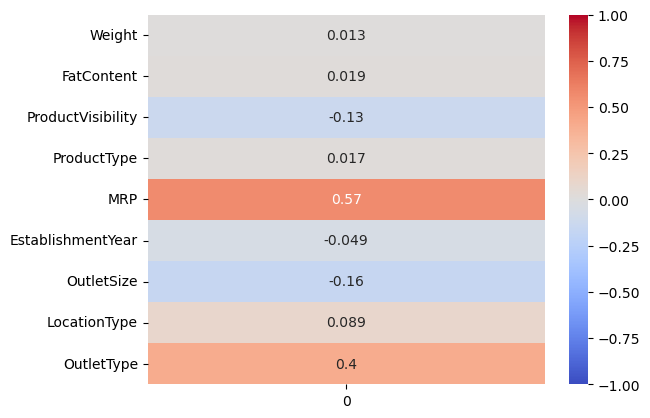

In [48]:
import seaborn as sns

# Separate target variable from predictor variables
X = train.drop("OutletSales", axis=1)
y = train["OutletSales"]

# Calculate correlation matrix
corr_matrix = X.corrwith(y)

# Visualize as heatmap
sns.heatmap(corr_matrix.to_frame(), cmap="coolwarm", annot=True, vmin=-1, vmax=1)

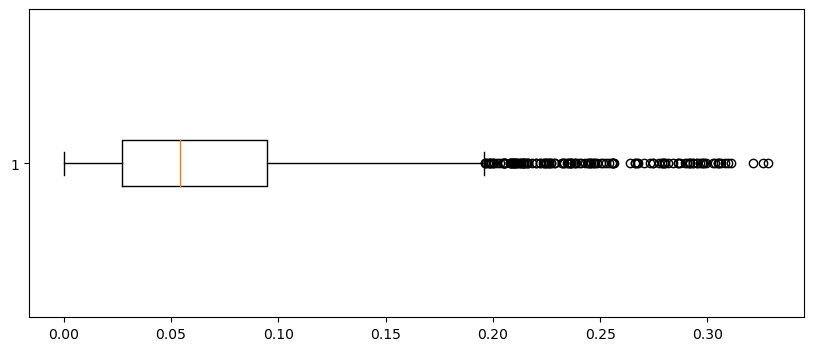

In [49]:
# Numeric Attributes are  'Weight', 'ProductVisibility', 'MRP', 'EstablishmentYear'
plt.figure(figsize=(10, 4))
plt.boxplot(train['ProductVisibility'],vert = False)
plt.show()

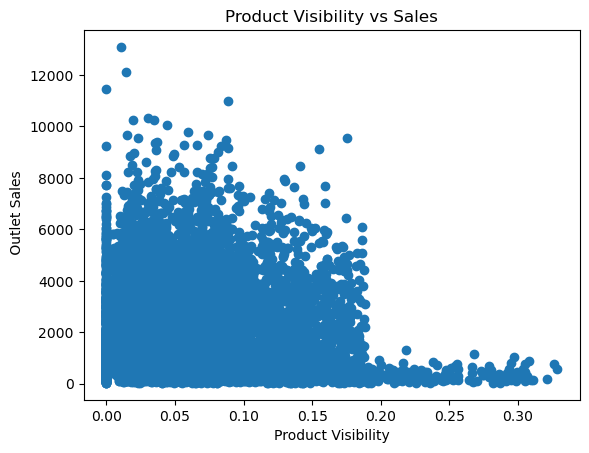

In [50]:
plt.scatter(train['ProductVisibility'], train['OutletSales'])
plt.title('Product Visibility vs Sales')
plt.xlabel('Product Visibility')
plt.ylabel(' Outlet Sales')
plt.show()

In [51]:
X.columns

Index(['ProductID', 'Weight', 'FatContent', 'ProductVisibility', 'ProductType',
       'MRP', 'OutletID', 'EstablishmentYear', 'OutletSize', 'LocationType',
       'OutletType'],
      dtype='object')

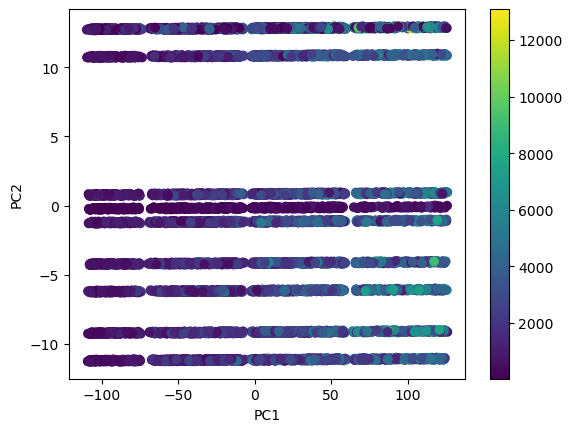

In [52]:
# Drop non-numeric columns from features
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

numeric_cols = ['Weight', 'ProductVisibility', 'MRP', 'EstablishmentYear']
X1 = X[numeric_cols]

# Fit PCA to the features
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X1)

# Plot PCA results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=train['OutletSales'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()
plt.show()

In [53]:
# Apply one hot encoding to ProductID column
product_id_encoding = pd.get_dummies(train['ProductID'], prefix='ProductID')
train_1 = pd.concat([train, product_id_encoding], axis=1)

# Drop original ProductID column
train_1 = train.drop(['ProductID'], axis=1)

In [54]:
import pandas as pd

# Convert categorical features into numerical format using one-hot encoding
df_encoded = pd.get_dummies(train_1, columns=["ProductType", "OutletID", "OutletSize", "LocationType", "OutletType"])
df_encoded.columns

Index(['Weight', 'FatContent', 'ProductVisibility', 'MRP', 'EstablishmentYear',
       'OutletSales', 'ProductType_0', 'ProductType_1', 'ProductType_2',
       'ProductType_3', 'ProductType_4', 'ProductType_5', 'ProductType_6',
       'ProductType_7', 'ProductType_8', 'ProductType_9', 'ProductType_10',
       'ProductType_11', 'ProductType_12', 'ProductType_13', 'ProductType_14',
       'ProductType_15', 'OutletID_OUT010', 'OutletID_OUT013',
       'OutletID_OUT017', 'OutletID_OUT018', 'OutletID_OUT019',
       'OutletID_OUT027', 'OutletID_OUT035', 'OutletID_OUT045',
       'OutletID_OUT046', 'OutletID_OUT049', 'OutletSize_0', 'OutletSize_1',
       'OutletSize_2', 'LocationType_0', 'LocationType_1', 'LocationType_2',
       'OutletType_0', 'OutletType_1', 'OutletType_2', 'OutletType_3'],
      dtype='object')

Text(0.5, 1.0, '1st PC')

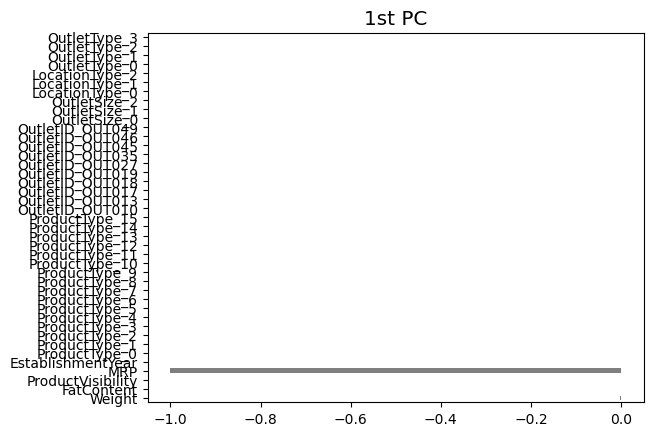

In [55]:
from numpy import linalg
fig,axes = plt.subplots(1,1,sharex=True)

X1 = df_encoded.drop(['OutletSales'], axis=1)
cov = X1.cov().to_numpy()
A = X1.to_numpy()
[eigvals, pcs] = linalg.eig(cov)

attrib = list(X1.columns)         # get attribute names
pcdata  = pd.Series(pcs[:,0], index=attrib)
pcdata.plot(kind='barh',ax=axes,color='k',alpha=0.5)
axes.set_title(r'1st PC', size = 'x-large')

Text(0.5, 1.0, '1st PC')

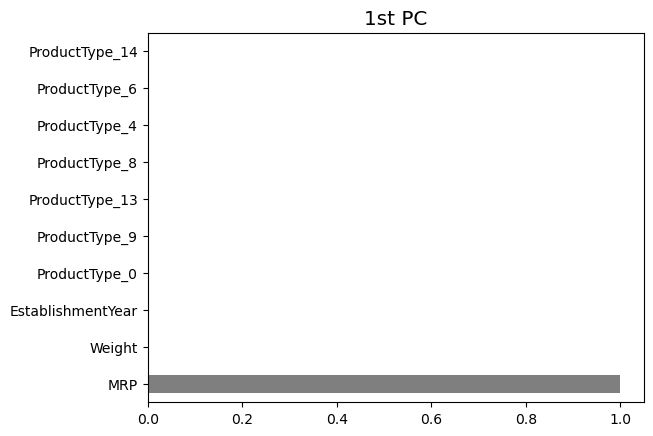

In [56]:
from numpy import linalg
fig,axes = plt.subplots(1,1,sharex=True)

X1 = df_encoded.drop(['OutletSales'], axis=1)
cov = X1.cov().to_numpy()
A = X1.to_numpy()
[eigvals, pcs] = linalg.eig(cov)

attrib = list(X1.columns)         # get attribute names
pcdata  = pd.Series(pcs[:,0], index=attrib)
pcdata_sorted = pcdata.abs().sort_values(ascending=False)[:10] # get top 5 attributes
pcdata_sorted.plot(kind='barh',ax=axes,color='k',alpha=0.5)
axes.set_title(r'1st PC', size = 'x-large')


In [57]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Separate target variable from predictor variables
X = df_encoded.drop("OutletSales", axis=1)
y = df_encoded["OutletSales"]

# Initialize and fit PCA model
pca = PCA()
pca.fit(X)

# Get explained variance ratios for each principal component
explained_variances = pca.explained_variance_ratio_
print(explained_variances)

[9.75982401e-01 1.77184354e-02 5.42497084e-03 2.06871711e-04
 1.05915656e-04 8.97766770e-05 6.99460751e-05 6.26502624e-05
 3.58212574e-05 3.47671634e-05 3.07328668e-05 2.88896748e-05
 2.74384808e-05 2.45644966e-05 2.39198366e-05 2.26366761e-05
 1.95713929e-05 1.90880027e-05 1.53196224e-05 1.38713482e-05
 1.21587408e-05 8.06635313e-06 6.49763243e-06 5.24910992e-06
 4.48566304e-06 3.36313907e-06 1.98316153e-06 6.07605277e-07
 9.68610180e-33 9.68610180e-33 9.68610180e-33 9.68610180e-33
 9.68610180e-33 9.68610180e-33 9.68610180e-33 9.68610180e-33
 9.68610180e-33 9.68610180e-33 9.68610180e-33 9.68610180e-33
 9.68610180e-33]


In [58]:
len(X.columns)

41

In [59]:
xi = np.arange(1, 42, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)
print(yi,xi)

[0.9759824  0.99370084 0.99912581 0.99933268 0.99943859 0.99952837
 0.99959832 0.99966097 0.99969679 0.99973156 0.99976229 0.99979118
 0.99981862 0.99984318 0.9998671  0.99988974 0.99990931 0.9999284
 0.99994372 0.99995759 0.99996975 0.99997781 0.99998431 0.99998956
 0.99999405 0.99999741 0.99999939 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.        ] [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]


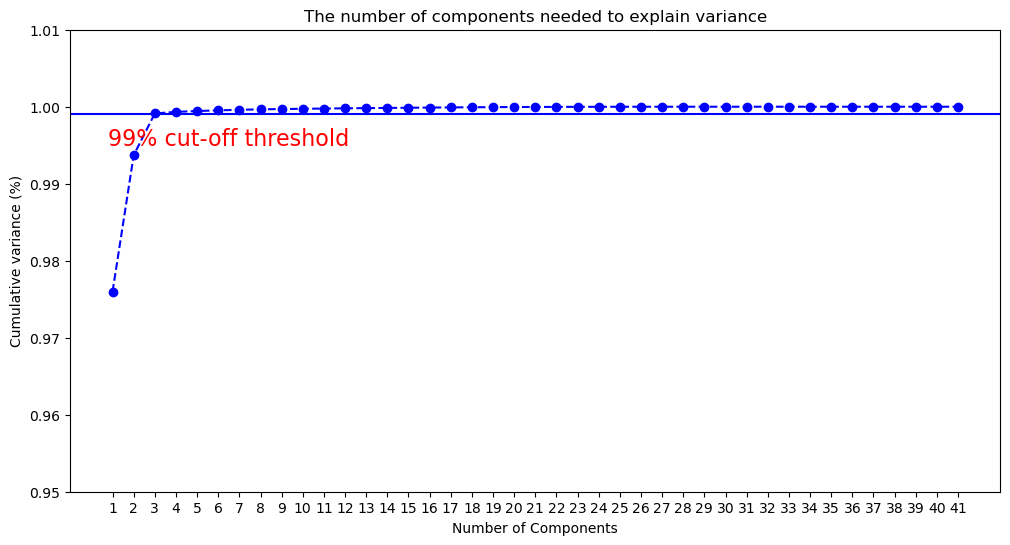

In [61]:
plt.rcParams["figure.figsize"] = (12,6)
plt.ylim(0.95,1.01)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 42, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.999, color='b', linestyle='-')
plt.text(0.8, 0.995, '99% cut-off threshold', color = 'red', fontsize=16)
# ax.grid(axis='x')
plt.show()

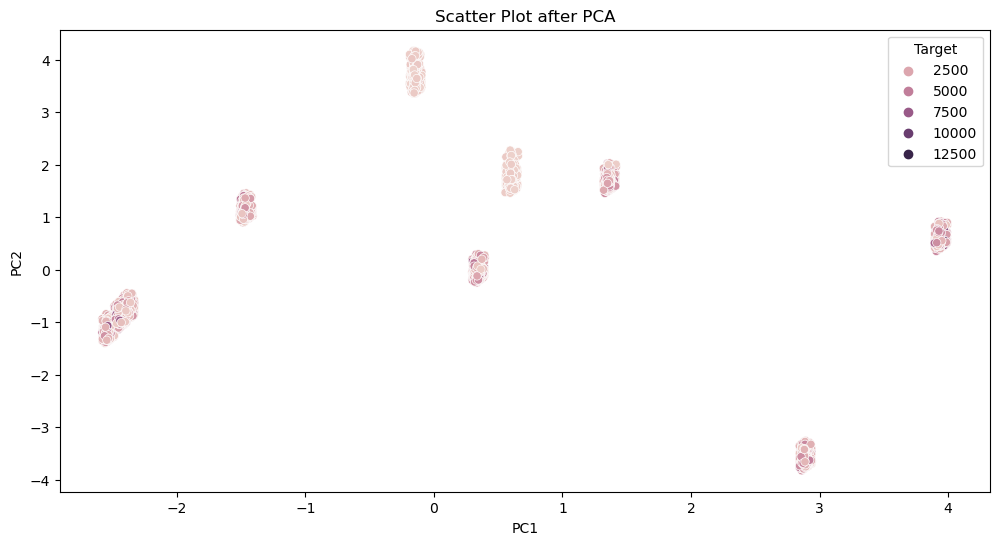

In [62]:
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns

# Separate target variable from predictor variables
X = df_encoded.drop("OutletSales", axis=1)
y = df_encoded["OutletSales"]

# Initialize and fit PCA model
pca = PCA()
pca.fit(X)

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_std)

# Create a new dataframe for the principal components and target variable
pca_df = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])
pca_df['Target'] = y.values

# Plot the scatter plot with different colors for each target variable
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Target')
plt.title('Scatter Plot after PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

When the data points in a scatter plot form cluster groups, it means that there are patterns or similarities in the data that can be visually identified. In the context of PCA, the cluster groups may indicate that there are underlying structures or relationships between the predictor variables that are contributing to the variance in the data. By reducing the dimensionality of the data with PCA, we can more easily visualize these patterns and relationships, which can help us to better understand the data and potentially make more accurate predictions or insights. It is important to note, however, that the interpretation of the cluster groups will depend on the specific context and domain of the data, and should be further investigated and validated through additional analysis.

In [63]:
train.columns

Index(['ProductID', 'Weight', 'FatContent', 'ProductVisibility', 'ProductType',
       'MRP', 'OutletID', 'EstablishmentYear', 'OutletSize', 'LocationType',
       'OutletType', 'OutletSales'],
      dtype='object')

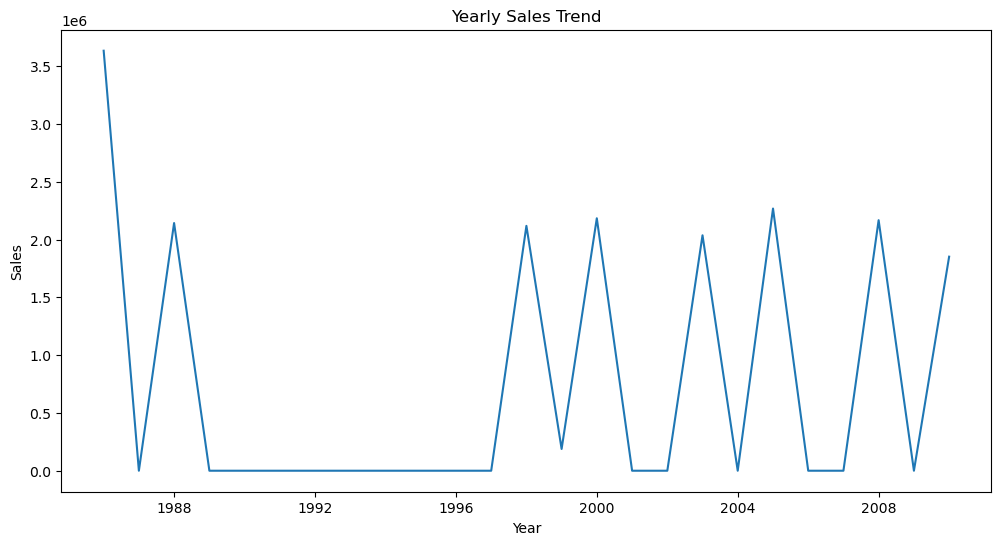

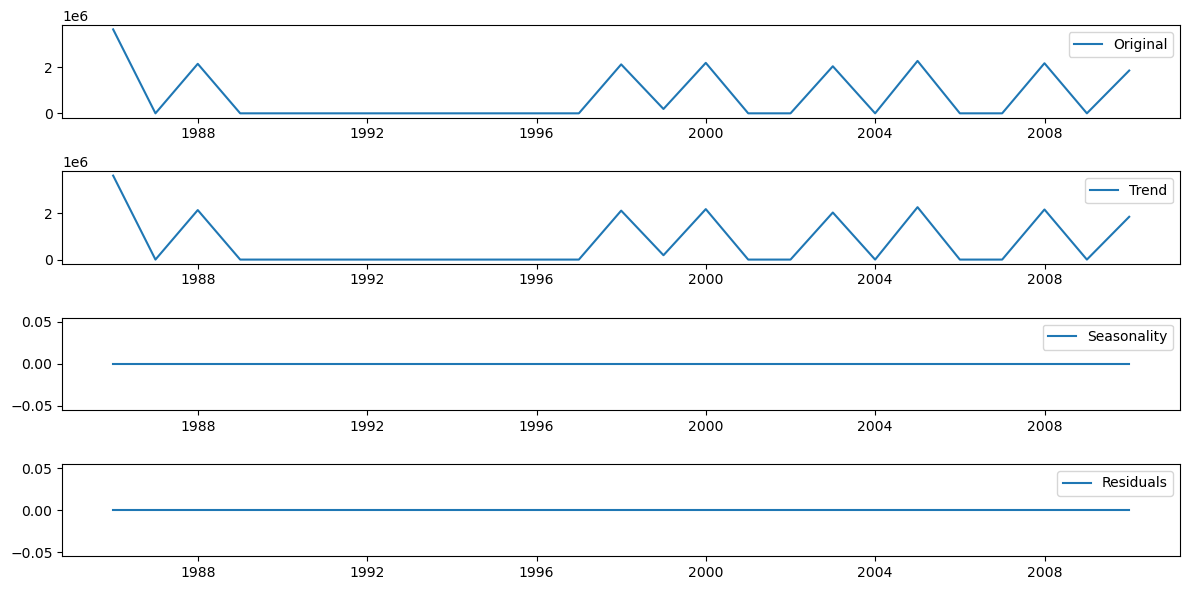

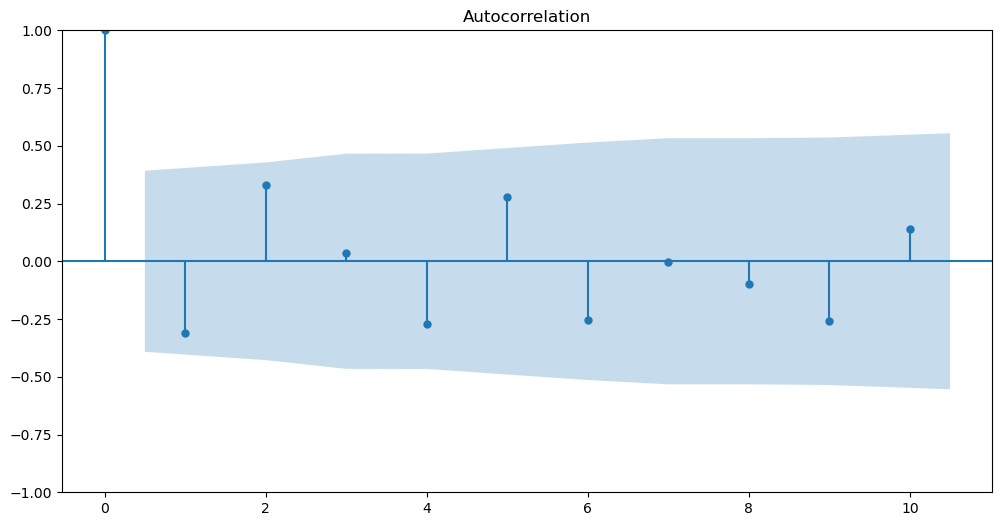

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the data
df = pd.read_csv('Train-Set.csv')

# Convert EstablishmentYear to datetime format and set as index
df['EstablishmentYear'] = pd.to_datetime(df['EstablishmentYear'], format='%Y')
df.set_index('EstablishmentYear', inplace=True)

# Resample the data to yearly frequency
df_yearly = df.resample('Y').sum()

# Plot the sales data
plt.plot(df_yearly['OutletSales'])
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

# Perform time-series decomposition
decomposition = seasonal_decompose(df_yearly['OutletSales'], period=1)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposition components
plt.subplot(411)
plt.plot(df_yearly['OutletSales'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

# Autocorrelation analysis
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df_yearly['OutletSales'], lags=10)
plt.show()



In [65]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# load the data
X = df_encoded.drop("OutletSales", axis=1)
y = df_encoded["OutletSales"]

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create the GBM model
gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# train the model on the training data
gbm.fit(X_train, y_train)

# make predictions on the test data
y_pred = gbm.predict(X_test)

# evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 1067397.5223322932


<AxesSubplot:>

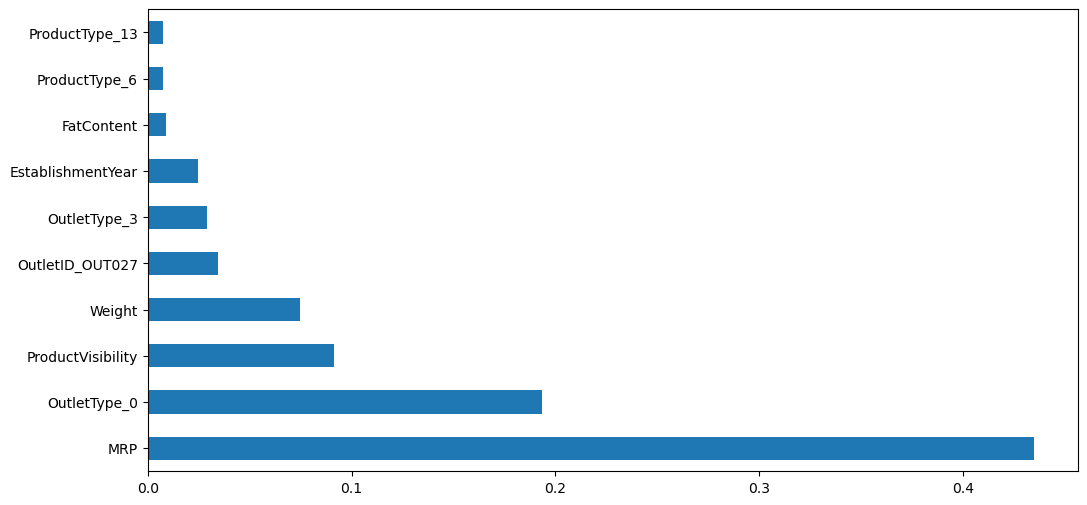

In [66]:
from sklearn.ensemble import RandomForestRegressor
# Separate target variable from predictor variables
X = df_encoded.drop("OutletSales", axis=1)
y = df_encoded["OutletSales"]

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a random forest model to calculate feature importances
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# make predictions on the test data
y_pred = rf.predict(X_test)

# Plot feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
mean_absolute_error(y_test, y_pred)

Mean Squared Error: 1167258.7784621501


756.4424220234604

In [68]:
mean_squared_error(y_test, y_pred)


1167258.7784621501

In [69]:
np.sqrt(mean_squared_error(y_test, y_pred))

1080.3975094668397

In [70]:
r2_score(y_test, y_pred)

0.570540237805072

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, roc_curve, auc
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, train_test_split, learning_curve
from sklearn import tree
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [73]:
pip install xgboost


     --------------------------------------- 70.9/70.9 MB 16.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb

def get_hyperparameters(method):
    if method == "SVR":
        # Hyperparameters for SVR
        hyperparameters = {
            "kernel": ["linear", "poly", "rbf", "sigmoid"],
            "C": [0.1, 1, 10],
            "epsilon": [0.01, 0.1, 1],
            "gamma": ["scale", "auto"]
        }
        regressor = SVR()
        
    elif method == "LR":
        # Hyperparameters for Linear Regression
        hyperparameters = {
            "fit_intercept": [True, False],
            "normalize": [True, False]
        }
        regressor = LinearRegression()
        
    elif method == "XGB":
        # Hyperparameters for XGBoost
        hyperparameters = {
            "learning_rate": [0.01, 0.1, 0.5],
            "max_depth": [3, 5, 7],
            "min_child_weight": [1, 3, 5],
            "gamma": [0.1, 0.5, 1],
            "subsample": [0.5, 0.8, 1.0],
            "colsample_bytree": [0.5, 0.8, 1.0]
        }
        regressor = xgb.XGBRegressor(objective='reg:squarederror')
        
    elif method == "DT":
        # Hyperparameters for Decision Tree
        hyperparameters = {
            "criterion": ["mse", "friedman_mse", "mae"],
            "max_depth": [3, 5, 7, None],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4]
        }
        regressor = DecisionTreeRegressor()
        
    elif method == "Lasso":
        # Hyperparameters for Lasso Regression
        hyperparameters = {
            "alpha": [0.1, 1, 10],
            "fit_intercept": [True, False],
            "normalize": [True, False],
            "selection": ["cyclic", "random"]
        }
        regressor = Lasso()
        
    elif method == "Ridge":
        # Hyperparameters for Ridge Regression
        hyperparameters = {
            "alpha": [0.1, 1, 10],
            "fit_intercept": [True, False],
            "normalize": [True, False],
            "solver": ["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga"]
        }
        regressor = Ridge()
    
    # Use GridSearchCV to perform hyperparameter tuning
    grid_search = GridSearchCV(regressor, hyperparameters, cv=5, n_jobs=-1, scoring="neg_mean_squared_error")
    
    return grid_search


In [75]:
# Split the dataset into train and test sets
X = df_encoded.drop(['OutletSales'], axis=1)
y = df_encoded['OutletSales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the SVM model
svm = get_hyperparameters("SVR")

# Fit the model on the training data
svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm.predict(X_test)

# Calculate the mean squared error and r-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error: ", mse)
print("R-squared score: ", r2)

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Create the linear regression model
lr = get_hyperparameters("LR")

# Fit the model on the training data
lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr.predict(X_test)

# Calculate the mean squared error and r-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error: ", mse)
print("R-squared score: ", r2)


In [ ]:
import xgboost as xgb

# Create the XGBoost model
xgb_model = get_hyperparameters("XGB")

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_model.predict(X_test)

# Calculate the mean squared error and r-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error: ", mse)
print("R-squared score: ", r2)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Split the dataset into train and test sets
X = df_encoded.drop(['OutletSales'], axis=1)
y = df_encoded['OutletSales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Decision Tree model
dt = get_hyperparameters("DT")

# Fit the model on the training data
dt.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt.predict(X_test)

# Calculate the mean squared error and r-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error: ", mse)
print("R-squared score: ", r2)


In [ ]:
from sklearn.linear_model import Lasso
# Create the Lasso model
lasso = get_hyperparameters("Lasso")

# Fit the model on the training data
lasso.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lasso.predict(X_test)

# Calculate the mean squared error and r-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error: ", mse)
print("R-squared score: ", r2)

In [ ]:
# Import necessary libraries
from sklearn.linear_model import Ridge

# Create the Ridge model
ridge = get_hyperparameters("Ridge")

# Fit the model on the training data
ridge.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ridge.predict(X_test)

# Calculate the mean squared error and r-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error: ", mse)
print("R-squared score: ", r2)


In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression, RFE

In [ ]:
selector = SelectKBest(f_regression, k=8)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

selected_features = X_train.columns[selector.get_support()]

print("Selected features:", selected_features)

In [ ]:
estimator = [lr,xgb_model,lasso,ridge,dt]

for i in estimator:
  selector = RFE(i, n_features_to_select=8, step=1)
  X_train_selected = selector.fit_transform(X_train, y_train)
  X_test_selected = selector.transform(X_test)
  selected_features = X_train.columns[selector.get_support()]
  print("Selected features for the",i,'are',selected_features)
     